In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:


filename = os.path.join(os.getcwd(), "dataframes", "actReading_11.csv")
filename2 = os.path.join(os.getcwd(), "dataframes", "scantronReading_38.csv")
filename3 = os.path.join(os.getcwd(),"dataframes", "actMath_11.csv")
filename4 = os.path.join(os.getcwd(),"dataframes", "actMath_11_encoded_df.csv")
filename5 = os.path.join(os.getcwd(), "dataframes", "scantronReading_38_encoded.csv")

actReading_11_df = pd.read_csv(filename, header = 0)
scantron_reading38 = pd.read_csv(filename2, header = 0)
actMath_11_df = pd.read_csv(filename3, header = 0)
actMath_11_encoded_df = pd.read_csv(filename4, header = 0)
scantron_reading38_encoded_df = pd.read_csv(filename5, header = 0)


Act Reading 


-District 45
-Year (Features): 2017
-Grades 11
-Features:
-Num features: 
-Label:
-Accuracy:
-F1:
-Other Metrics:
-Notes:


In [4]:
actReading_11_df.head(8)


,studentId,is_proficient,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Softba,course_AcAdv.Volley,course_Accounting,course_Adv BTA,course_Advanced Agr,course_Agriscience,course_Alg Esntls B,course_Alg II/Trig,course_AlgEnrichmet,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra II,course_AlgebraicCon,course_Anat/Physio,course_Anthropology,course_Art App,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BIOLOGY ADV,course_Bak & Pstr A,course_BandConcer.5,course_BandConcer1C,course_BandMarch.5C,course_BandSymph 1C,course_Biology,course_Biology Adv,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_Cabntmkng I,course_Cabntmkng II,course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Chemistry,course_ChemistryAdv,course_Const Fin In,course_Const Frmng,course_ContempIss1C,course_Crea Writing,course_CreatWrt.5C,course_Credit Recov,course_Culinary I,course_Culinary II,course_D&TSafetyEd,course_DRIVERS ED,course_Dance 9-12,course_Digitl Dsgn,course_ESLEnrich912,course_ESLLang9-12,course_Ear/SpaceSci,course_Eng Ess 10,course_Eng Ess 11,course_Eng Gr10 Adv,course_EngGr9-CR,"course_EngLang,BS10",course_EnglGr10ACCE,course_English Gr 9,course_English Gr10,course_English Gr11,course_Enrichmt6-12,course_Enviro Sci,course_Ess II:USHis,course_Ess: E & SS,course_Ess: Phy Sci,course_EssIII:USHis,course_EssPhySci,course_EventPlan,course_FACS,course_FAM CON SC,course_Fit Life .5C,course_Fit/Cond,course_Food Inno,course_Food Nutritn,course_For/Cri Inve,course_Forestry,course_Found AAVTC,course_FrenchIACCE,course_Fund Agrisci,course_GEOM ADV,course_Geo Ess,course_Geometry,course_Geometry Adv,course_GeometryACCE,course_German1ACCES,course_Guitar,course_HEALTH 9-12,course_HEALTH ACCES,course_HISTUS1877AC,course_HS US 10 ADV,course_Health 9-12,course_HealthACCESS,course_Hosp Tourism,course_INFO SUP SVC,course_IT Fndamntls,course_IT Supp/Serv,course_Inet Mktg,course_Int Ad Desgn,course_Int Metl Fab,course_Inter Drftng,course_Intermed Agr,course_Intr Fire Sc,course_Intro Drftng,course_Jazz 1C,course_Journal1ACC,course_Journalism 1,course_LATIN 1 ACC,course_LAW IN SOCIE,course_LIFE PE 9-12,course_LIFEPE9-12.5,course_MARKET PRIN,course_MarchAux.5C,course_MarchAux1C,course_Marine Sci,course_Mktng Prin,course_Mnt Lt Rpr A,course_Mnt Lt Rpr B,course_Multimed Des,course_Multimed Pub,course_Music App,course_MusicTheatre,course_MusicTherI.5,course_MusicThry AP,course_MusicalDrama,course_Mustang Advi,course_NCCER ET1,course_NCCER ET2,course_NCCER Wldg1,course_NCCER Wldg2,course_Painting,course_Panther Adv,course_Per Finance,course_Percuss 1C,course_Phy Sci Adv,course_PhySciACCESS,course_Physical Sci,course_Piano .5C,course_Plumb/Pipe I,course_Plumb/PipeII,course_Prn Pub Serv,course_Psyc AP Acc,course_PsychACCESS,course_Psycholog.5C,course_Psychology,course_R/DinPhysics,course_RdIntrv7-12,course_Robotics App,course_SPAN II ACCE,course_SPANISH I,course_SPANISH II,course_Sociology,course_SociologyACC,course_Span2ACCESS,course_SpanIACC,course_Spanish 1,course_Spanish 2,course_Spanish 3,course_Speech 1,course_Spo&En Mktg,course_StuAiOff912,course_StudyHall912,course_TA-Partridge,course_Tech Theater,course_Theatre I,course_Theatre II,course_TmSpts,course_TmSpts-Dance,course_Tran Serv I,course_Tran Serv II,course_TranSer 11,course_TranSer El.5,course_TranSer10,course_Travl Tour I,course_US His-1877,course_USHis 1877-P,course_USHis I Adv,course_USHis I G10,course_USHis InD-P,course_USHisIG10ACC,course_VarBkbalI,course_VarBkbalII,course_VarBsbalI,course_VarBsbalII,course_VarBsblIV,course_VarCheerII,course_VarFBI,course_VarFBII,course

In [5]:
actReading_11_df.shape

(2578, 241)

In [6]:
actReading_11_df.columns
print(actReading_11_df.dtypes)

studentId                 int64
is_proficient              bool
proficient_score        float64
course_ACT Review          bool
course_ACT/WK Rev.         bool
course_ACTReview.5C        bool
course_AG Communica        bool
course_AIDE-ELEM           bool
course_AIDE-LIB            bool
course_ALG I B ACCE        bool
course_ALIITRIGH/A         bool
course_ARMY LET I          bool
course_ARMY LET II         bool
course_ARMY LET III        bool
course_ARMY LET IV         bool
course_ARMYLETIVACT        bool
course_AcAdv.Baseba        bool
course_AcAdv.Basket        bool
course_AcAdv.CrossC        bool
course_AcAdv.Footb         bool
course_AcAdv.Softba        bool
course_AcAdv.Volley        bool
course_Accounting          bool
course_Adv BTA             bool
course_Advanced Agr        bool
course_Agriscience         bool
course_Alg Esntls B        bool
course_Alg II/Trig         bool
course_AlgEnrichmet        bool
course_AlgII/TrigAC        bool
course_Algebra I           bool
course_A

In [7]:
actReading_11_df[actReading_11_df.select_dtypes(include=['bool']).columns] = actReading_11_df.select_dtypes(include=['bool']).astype(int)


In [8]:
actReading_11_df.dtypes

studentId                 int64
is_proficient             int32
proficient_score        float64
course_ACT Review         int32
course_ACT/WK Rev.        int32
course_ACTReview.5C       int32
course_AG Communica       int32
course_AIDE-ELEM          int32
course_AIDE-LIB           int32
course_ALG I B ACCE       int32
course_ALIITRIGH/A        int32
course_ARMY LET I         int32
course_ARMY LET II        int32
course_ARMY LET III       int32
course_ARMY LET IV        int32
course_ARMYLETIVACT       int32
course_AcAdv.Baseba       int32
course_AcAdv.Basket       int32
course_AcAdv.CrossC       int32
course_AcAdv.Footb        int32
course_AcAdv.Softba       int32
course_AcAdv.Volley       int32
course_Accounting         int32
course_Adv BTA            int32
course_Advanced Agr       int32
course_Agriscience        int32
course_Alg Esntls B       int32
course_Alg II/Trig        int32
course_AlgEnrichmet       int32
course_AlgII/TrigAC       int32
course_Algebra I          int32
course_A

In [9]:
#use proficient_score as my label 
#look at the range of proficent_score
actReading_11_df_copy1 = actReading_11_df.drop([ 'studentId'], axis=1).copy()
actReading_11_df_copy1.head(10)

,is_proficient,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Softba,course_AcAdv.Volley,course_Accounting,course_Adv BTA,course_Advanced Agr,course_Agriscience,course_Alg Esntls B,course_Alg II/Trig,course_AlgEnrichmet,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra II,course_AlgebraicCon,course_Anat/Physio,course_Anthropology,course_Art App,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BIOLOGY ADV,course_Bak & Pstr A,course_BandConcer.5,course_BandConcer1C,course_BandMarch.5C,course_BandSymph 1C,course_Biology,course_Biology Adv,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_Cabntmkng I,course_Cabntmkng II,course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Chemistry,course_ChemistryAdv,course_Const Fin In,course_Const Frmng,course_ContempIss1C,course_Crea Writing,course_CreatWrt.5C,course_Credit Recov,course_Culinary I,course_Culinary II,course_D&TSafetyEd,course_DRIVERS ED,course_Dance 9-12,course_Digitl Dsgn,course_ESLEnrich912,course_ESLLang9-12,course_Ear/SpaceSci,course_Eng Ess 10,course_Eng Ess 11,course_Eng Gr10 Adv,course_EngGr9-CR,"course_EngLang,BS10",course_EnglGr10ACCE,course_English Gr 9,course_English Gr10,course_English Gr11,course_Enrichmt6-12,course_Enviro Sci,course_Ess II:USHis,course_Ess: E & SS,course_Ess: Phy Sci,course_EssIII:USHis,course_EssPhySci,course_EventPlan,course_FACS,course_FAM CON SC,course_Fit Life .5C,course_Fit/Cond,course_Food Inno,course_Food Nutritn,course_For/Cri Inve,course_Forestry,course_Found AAVTC,course_FrenchIACCE,course_Fund Agrisci,course_GEOM ADV,course_Geo Ess,course_Geometry,course_Geometry Adv,course_GeometryACCE,course_German1ACCES,course_Guitar,course_HEALTH 9-12,course_HEALTH ACCES,course_HISTUS1877AC,course_HS US 10 ADV,course_Health 9-12,course_HealthACCESS,course_Hosp Tourism,course_INFO SUP SVC,course_IT Fndamntls,course_IT Supp/Serv,course_Inet Mktg,course_Int Ad Desgn,course_Int Metl Fab,course_Inter Drftng,course_Intermed Agr,course_Intr Fire Sc,course_Intro Drftng,course_Jazz 1C,course_Journal1ACC,course_Journalism 1,course_LATIN 1 ACC,course_LAW IN SOCIE,course_LIFE PE 9-12,course_LIFEPE9-12.5,course_MARKET PRIN,course_MarchAux.5C,course_MarchAux1C,course_Marine Sci,course_Mktng Prin,course_Mnt Lt Rpr A,course_Mnt Lt Rpr B,course_Multimed Des,course_Multimed Pub,course_Music App,course_MusicTheatre,course_MusicTherI.5,course_MusicThry AP,course_MusicalDrama,course_Mustang Advi,course_NCCER ET1,course_NCCER ET2,course_NCCER Wldg1,course_NCCER Wldg2,course_Painting,course_Panther Adv,course_Per Finance,course_Percuss 1C,course_Phy Sci Adv,course_PhySciACCESS,course_Physical Sci,course_Piano .5C,course_Plumb/Pipe I,course_Plumb/PipeII,course_Prn Pub Serv,course_Psyc AP Acc,course_PsychACCESS,course_Psycholog.5C,course_Psychology,course_R/DinPhysics,course_RdIntrv7-12,course_Robotics App,course_SPAN II ACCE,course_SPANISH I,course_SPANISH II,course_Sociology,course_SociologyACC,course_Span2ACCESS,course_SpanIACC,course_Spanish 1,course_Spanish 2,course_Spanish 3,course_Speech 1,course_Spo&En Mktg,course_StuAiOff912,course_StudyHall912,course_TA-Partridge,course_Tech Theater,course_Theatre I,course_Theatre II,course_TmSpts,course_TmSpts-Dance,course_Tran Serv I,course_Tran Serv II,course_TranSer 11,course_TranSer El.5,course_TranSer10,course_Travl Tour I,course_US His-1877,course_USHis 1877-P,course_USHis I Adv,course_USHis I G10,course_USHis InD-P,course_USHisIG10ACC,course_VarBkbalI,course_VarBkbalII,course_VarBsbalI,course_VarBsbalII,course_VarBsblIV,course_VarCheerII,course_VarFBI,course_VarFBII,course_VarFBIII,

In [10]:
print(actReading_11_df_copy1.columns)
print(actReading_11_df_copy1.shape)

Index(['is_proficient', 'proficient_score', 'course_ACT Review',
       'course_ACT/WK Rev.', 'course_ACTReview.5C', 'course_AG Communica',
       'course_AIDE-ELEM', 'course_AIDE-LIB', 'course_ALG I B ACCE',
       'course_ALIITRIGH/A',
       ...
       'course_YearbkII9-12', 'course_Yearbook9-12', 'course_YrbkIII9-12',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading',
       'bbb_literacy'],
      dtype='object', length=240)
(2578, 240)


In [11]:
proficient_score = actReading_11_df_copy1['proficient_score'].describe()[['min','max']]
print(proficient_score)

min    0.222222
max    1.972222
Name: proficient_score, dtype: float64


In [12]:
yRead = actReading_11_df_copy1['proficient_score']
XRead= actReading_11_df_copy1.drop(['proficient_score','is_proficient'], axis=1)
print("Number of examples: " + str(XRead.shape[0]))

Number of examples: 2578


In [13]:
#Create Training and Test Data
X_trainRead,X_testRead, y_trainRead,y_testRead = train_test_split(XRead,yRead, test_size=0.33,stratify = actReading_11_df_copy1['is_proficient'],random_state=123)
print(X_trainRead.shape)
print(X_testRead.shape)

(1727, 238)
(851, 238)


In [14]:
#setting up the param grid, possible hyperparameter for max_depth and min_samples_leaf
max_depth_valuesRead = [8,12,25,32]
min_samples_leaf_valuesRead = [4,5,8,10]
param_gridRead = {'max_depth' : list(max_depth_valuesRead), 'min_samples_leaf' : list(min_samples_leaf_valuesRead)}


In [15]:
#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressorRead = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_gridRead = GridSearchCV(dt_regressorRead, param_gridRead, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_searchRead = dt_gridRead.fit(X_trainRead, y_trainRead)

print("Done")
dt_best_paramsRead = dt_grid_searchRead.best_params_

dt_best_paramsRead

#{'max_depth': 8, 'min_samples_leaf': 4}

Running Grid Search
Done


{'max_depth': 25, 'min_samples_leaf': 8}

In [16]:
#r2 is measure of the proprtion of the variability in the prediction that the model as able to make using the test data. R2 value of 1 is perfect and 0 means no explantory value
#RMSE average difference between the predicted values and actual values, lower rmse good performance (range is 0 to infinity)

dt_modelRead = DecisionTreeRegressor(max_depth=25, min_samples_leaf=4)
dt_modelRead.fit(X_trainRead,y_trainRead)

#testing model on the X_test
y_dt_predRead = dt_modelRead.predict(X_testRead)
dt_rmseRead = mean_squared_error(y_testRead,y_dt_predRead,squared=False)
dt_r2Read = r2_score(y_testRead,y_dt_predRead)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_read_bool = y_dt_predRead >= threshold
y_test_read_bool = y_testRead >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_read_bool, y_pred_read_bool))

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmseRead))
print('[DT] R2: {0}'.format(dt_r2Read))

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.91      0.76       477
        True       0.78      0.39      0.52       374

    accuracy                           0.68       851
   macro avg       0.72      0.65      0.64       851
weighted avg       0.71      0.68      0.66       851

[DT] Root Mean Squared Error: 0.2632037662493707
[DT] R2: 0.3050522148790965


In [17]:
importances = dt_modelRead.feature_importances_
feature_names = X_trainRead.columns

# Combine names and importances, and sort
importance_dfRead = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_dfRead= importance_dfRead.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_dfRead)

                  Feature  Importance
58    course_ChemistryAdv    0.371019
84      course_Enviro Sci    0.058024
40    course_BandConcer.5    0.036808
76    course_Eng Gr10 Adv    0.036392
29     course_Algebra I B    0.030121
183   course_StudyHall912    0.021477
109    course_HEALTH 9-12    0.018979
113    course_Health 9-12    0.016587
196    course_US His-1877    0.016391
172     course_SPANISH II    0.016226
42    course_BandMarch.5C    0.013508
198    course_USHis I Adv    0.013302
85    course_Ess II:USHis    0.012872
218     course_VisArtI.5C    0.012241
96    course_Food Nutritn    0.012143
234  school_High School D    0.011683
131   course_LIFE PE 9-12    0.011490
110   course_HEALTH ACCES    0.011201
117   course_IT Fndamntls    0.011155
56    course_CareerPrep-B    0.010554
208         course_VarFBI    0.010470
186      course_Theatre I    0.010369
124   course_Intr Fire Sc    0.009557
200    course_USHis InD-P    0.009314
153    course_Panther Adv    0.009173
104       co

In [18]:
importance_dfRead.head(15)


,Feature,Importance
58,course_ChemistryAdv,0.371019
84,course_Enviro Sci,0.058024
40,course_BandConcer.5,0.036808
76,course_Eng Gr10 Adv,0.036392
29,course_Algebra I B,0.030121
183,course_StudyHall912,0.021477
109,course_HEALTH 9-12,0.018979
113,course_Health 9-12,0.016587
196,course_US His-1877,0.016391
172,course_SPANISH II,0.016226


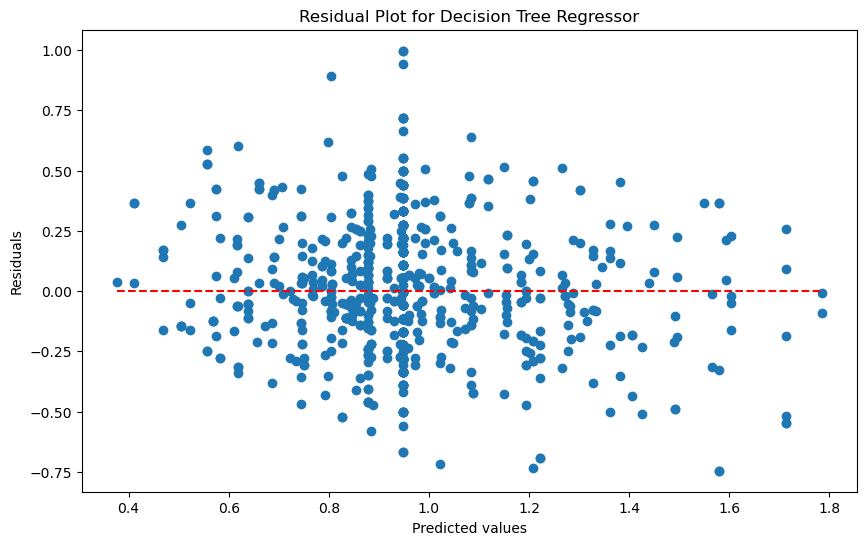

In [19]:
#Residual Analysis plot the errors between predicted and actual values
residualsRead = y_testRead-y_dt_predRead
plt.figure(figsize=(10, 6))


plt.scatter(y_dt_predRead, residualsRead)
plt.hlines(y=0, xmin=min(y_dt_predRead), xmax=max(y_dt_predRead), colors='r', linestyles='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Decision Tree Regressor")
plt.show()



Act Math

In [20]:
actMath_11_df.head(10)

,studentId,is_proficient,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Softba,course_AcAdv.Volley,course_Accounting,course_Adv BTA,course_Advanced Agr,course_Agriscience,course_Alg Esntls B,course_Alg II/Trig,course_AlgEnrichmet,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra II,course_AlgebraicCon,course_Anat/Physio,course_Anthropology,course_Art App,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BIOLOGY ADV,course_Bak & Pstr A,course_BandConcer.5,course_BandConcer1C,course_BandMarch.5C,course_BandSymph 1C,course_Biology,course_Biology Adv,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_Cabntmkng I,course_Cabntmkng II,course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Chemistry,course_ChemistryAdv,course_Const Fin In,course_Const Frmng,course_ContempIss1C,course_Crea Writing,course_CreatWrt.5C,course_Credit Recov,course_Culinary I,course_Culinary II,course_D&TSafetyEd,course_DRIVERS ED,course_Dance 9-12,course_Digitl Dsgn,course_ESLEnrich912,course_ESLLang9-12,course_Ear/SpaceSci,course_Eng Ess 10,course_Eng Ess 11,course_Eng Gr10 Adv,course_EngGr9-CR,"course_EngLang,BS10",course_EnglGr10ACCE,course_English Gr 9,course_English Gr10,course_English Gr11,course_Enrichmt6-12,course_Enviro Sci,course_Ess II:USHis,course_Ess: E & SS,course_Ess: Phy Sci,course_EssIII:USHis,course_EssPhySci,course_EventPlan,course_FACS,course_FAM CON SC,course_Fit Life .5C,course_Fit/Cond,course_Food Inno,course_Food Nutritn,course_For/Cri Inve,course_Forestry,course_Found AAVTC,course_FrenchIACCE,course_Fund Agrisci,course_GEOM ADV,course_Geo Ess,course_Geometry,course_Geometry Adv,course_GeometryACCE,course_German1ACCES,course_Guitar,course_HEALTH 9-12,course_HEALTH ACCES,course_HISTUS1877AC,course_HS US 10 ADV,course_Health 9-12,course_HealthACCESS,course_Hosp Tourism,course_INFO SUP SVC,course_IT Fndamntls,course_IT Supp/Serv,course_Inet Mktg,course_Int Ad Desgn,course_Int Metl Fab,course_Inter Drftng,course_Intermed Agr,course_Intr Fire Sc,course_Intro Drftng,course_Jazz 1C,course_Journal1ACC,course_Journalism 1,course_LATIN 1 ACC,course_LAW IN SOCIE,course_LIFE PE 9-12,course_LIFEPE9-12.5,course_MARKET PRIN,course_MarchAux.5C,course_MarchAux1C,course_Marine Sci,course_Mktng Prin,course_Mnt Lt Rpr A,course_Mnt Lt Rpr B,course_Multimed Des,course_Multimed Pub,course_Music App,course_MusicTheatre,course_MusicTherI.5,course_MusicThry AP,course_MusicalDrama,course_Mustang Advi,course_NCCER ET1,course_NCCER ET2,course_NCCER Wldg1,course_NCCER Wldg2,course_Painting,course_Panther Adv,course_Per Finance,course_Percuss 1C,course_Phy Sci Adv,course_PhySciACCESS,course_Physical Sci,course_Piano .5C,course_Plumb/Pipe I,course_Plumb/PipeII,course_Prn Pub Serv,course_Psyc AP Acc,course_PsychACCESS,course_Psycholog.5C,course_Psychology,course_R/DinPhysics,course_RdIntrv7-12,course_Robotics App,course_SPAN II ACCE,course_SPANISH I,course_SPANISH II,course_Sociology,course_SociologyACC,course_Span2ACCESS,course_SpanIACC,course_Spanish 1,course_Spanish 2,course_Spanish 3,course_Speech 1,course_Spo&En Mktg,course_StuAiOff912,course_StudyHall912,course_TA-Partridge,course_Tech Theater,course_Theatre I,course_Theatre II,course_TmSpts,course_TmSpts-Dance,course_Tran Serv I,course_Tran Serv II,course_TranSer 11,course_TranSer El.5,course_TranSer10,course_Travl Tour I,course_US His-1877,course_USHis 1877-P,course_USHis I Adv,course_USHis I G10,course_USHis InD-P,course_USHisIG10ACC,course_VarBkbalI,course_VarBkbalII,course_VarBsbalI,course_VarBsbalII,course_VarBsblIV,course_VarCheerII,course_VarFBI,course_VarFBII,course

In [21]:
#using proficient_score 
actMath_11df_copy = actMath_11_df.drop(['is_proficient', 'studentId'], axis=1).copy()
actMath_11df_copy.head(10)


,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Softba,course_AcAdv.Volley,course_Accounting,course_Adv BTA,course_Advanced Agr,course_Agriscience,course_Alg Esntls B,course_Alg II/Trig,course_AlgEnrichmet,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra II,course_AlgebraicCon,course_Anat/Physio,course_Anthropology,course_Art App,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BIOLOGY ADV,course_Bak & Pstr A,course_BandConcer.5,course_BandConcer1C,course_BandMarch.5C,course_BandSymph 1C,course_Biology,course_Biology Adv,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_Cabntmkng I,course_Cabntmkng II,course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Chemistry,course_ChemistryAdv,course_Const Fin In,course_Const Frmng,course_ContempIss1C,course_Crea Writing,course_CreatWrt.5C,course_Credit Recov,course_Culinary I,course_Culinary II,course_D&TSafetyEd,course_DRIVERS ED,course_Dance 9-12,course_Digitl Dsgn,course_ESLEnrich912,course_ESLLang9-12,course_Ear/SpaceSci,course_Eng Ess 10,course_Eng Ess 11,course_Eng Gr10 Adv,course_EngGr9-CR,"course_EngLang,BS10",course_EnglGr10ACCE,course_English Gr 9,course_English Gr10,course_English Gr11,course_Enrichmt6-12,course_Enviro Sci,course_Ess II:USHis,course_Ess: E & SS,course_Ess: Phy Sci,course_EssIII:USHis,course_EssPhySci,course_EventPlan,course_FACS,course_FAM CON SC,course_Fit Life .5C,course_Fit/Cond,course_Food Inno,course_Food Nutritn,course_For/Cri Inve,course_Forestry,course_Found AAVTC,course_FrenchIACCE,course_Fund Agrisci,course_GEOM ADV,course_Geo Ess,course_Geometry,course_Geometry Adv,course_GeometryACCE,course_German1ACCES,course_Guitar,course_HEALTH 9-12,course_HEALTH ACCES,course_HISTUS1877AC,course_HS US 10 ADV,course_Health 9-12,course_HealthACCESS,course_Hosp Tourism,course_INFO SUP SVC,course_IT Fndamntls,course_IT Supp/Serv,course_Inet Mktg,course_Int Ad Desgn,course_Int Metl Fab,course_Inter Drftng,course_Intermed Agr,course_Intr Fire Sc,course_Intro Drftng,course_Jazz 1C,course_Journal1ACC,course_Journalism 1,course_LATIN 1 ACC,course_LAW IN SOCIE,course_LIFE PE 9-12,course_LIFEPE9-12.5,course_MARKET PRIN,course_MarchAux.5C,course_MarchAux1C,course_Marine Sci,course_Mktng Prin,course_Mnt Lt Rpr A,course_Mnt Lt Rpr B,course_Multimed Des,course_Multimed Pub,course_Music App,course_MusicTheatre,course_MusicTherI.5,course_MusicThry AP,course_MusicalDrama,course_Mustang Advi,course_NCCER ET1,course_NCCER ET2,course_NCCER Wldg1,course_NCCER Wldg2,course_Painting,course_Panther Adv,course_Per Finance,course_Percuss 1C,course_Phy Sci Adv,course_PhySciACCESS,course_Physical Sci,course_Piano .5C,course_Plumb/Pipe I,course_Plumb/PipeII,course_Prn Pub Serv,course_Psyc AP Acc,course_PsychACCESS,course_Psycholog.5C,course_Psychology,course_R/DinPhysics,course_RdIntrv7-12,course_Robotics App,course_SPAN II ACCE,course_SPANISH I,course_SPANISH II,course_Sociology,course_SociologyACC,course_Span2ACCESS,course_SpanIACC,course_Spanish 1,course_Spanish 2,course_Spanish 3,course_Speech 1,course_Spo&En Mktg,course_StuAiOff912,course_StudyHall912,course_TA-Partridge,course_Tech Theater,course_Theatre I,course_Theatre II,course_TmSpts,course_TmSpts-Dance,course_Tran Serv I,course_Tran Serv II,course_TranSer 11,course_TranSer El.5,course_TranSer10,course_Travl Tour I,course_US His-1877,course_USHis 1877-P,course_USHis I Adv,course_USHis I G10,course_USHis InD-P,course_USHisIG10ACC,course_VarBkbalI,course_VarBkbalII,course_VarBsbalI,course_VarBsbalII,course_VarBsblIV,course_VarCheerII,course_VarFBI,course_VarFBII,course_VarFBIII,course_VarSocI

In [22]:
print(actMath_11df_copy.shape)
print(actMath_11df_copy.columns)

(2580, 239)
Index(['proficient_score', 'course_ACT Review', 'course_ACT/WK Rev.',
       'course_ACTReview.5C', 'course_AG Communica', 'course_AIDE-ELEM',
       'course_AIDE-LIB', 'course_ALG I B ACCE', 'course_ALIITRIGH/A',
       'course_ARMY LET I',
       ...
       'course_YearbkII9-12', 'course_Yearbook9-12', 'course_YrbkIII9-12',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading',
       'bbb_literacy'],
      dtype='object', length=239)


In [23]:
actMath_11df_copy[actMath_11df_copy.select_dtypes(include=['bool']).columns] = actMath_11df_copy.select_dtypes(include=['bool']).astype(int)
actMath_11df_copy.dtypes

proficient_score        float64
course_ACT Review         int32
course_ACT/WK Rev.        int32
course_ACTReview.5C       int32
course_AG Communica       int32
course_AIDE-ELEM          int32
course_AIDE-LIB           int32
course_ALG I B ACCE       int32
course_ALIITRIGH/A        int32
course_ARMY LET I         int32
course_ARMY LET II        int32
course_ARMY LET III       int32
course_ARMY LET IV        int32
course_ARMYLETIVACT       int32
course_AcAdv.Baseba       int32
course_AcAdv.Basket       int32
course_AcAdv.CrossC       int32
course_AcAdv.Footb        int32
course_AcAdv.Softba       int32
course_AcAdv.Volley       int32
course_Accounting         int32
course_Adv BTA            int32
course_Advanced Agr       int32
course_Agriscience        int32
course_Alg Esntls B       int32
course_Alg II/Trig        int32
course_AlgEnrichmet       int32
course_AlgII/TrigAC       int32
course_Algebra I          int32
course_Algebra I A        int32
course_Algebra I B        int32
course_A

In [24]:
#training 
yMath = actMath_11df_copy['proficient_score']
XMath= actMath_11df_copy.drop(columns='proficient_score', axis=1)
print("Number of examples: " + str(XMath.shape[0]))

X_trainMath,X_testMath, y_trainMath,y_testMath = train_test_split(XMath,yMath, test_size=0.33, random_state=123)
print(X_trainMath.shape)
print(X_testMath.shape)

Number of examples: 2580
(1728, 238)
(852, 238)


In [25]:
max_depth_valuesMath = [8,12,25,32]
min_samples_leaf_valuesMath = [4,5,8,10]
param_gridMath = {'max_depth' : list(max_depth_valuesMath), 'min_samples_leaf' : list(min_samples_leaf_valuesMath)}

In [26]:
print("Running Grid Search")
dt_regressorMath = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_gridMath = GridSearchCV(dt_regressorMath, param_gridMath, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_searchMath = dt_gridMath.fit(X_trainMath, y_trainMath)

print("Done")
dt_best_paramsMath = dt_grid_searchMath.best_params_

dt_best_paramsMath

Running Grid Search
Done


{'max_depth': 32, 'min_samples_leaf': 5}

In [27]:
dt_modelMath = DecisionTreeRegressor(max_depth=25, min_samples_leaf=5)
dt_modelMath.fit(X_trainMath,y_trainMath)

#testing model on the X_test
y_dt_predMath = dt_modelMath.predict(X_testMath)
dt_rmseMath = mean_squared_error(y_testMath,y_dt_predMath,squared=False)
dt_r2Math = r2_score(y_testMath,y_dt_predMath)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmseMath))
print('[DT] R2: {0}'.format(dt_r2Math))

[DT] Root Mean Squared Error: 0.19234999802657088
[DT] R2: 0.293898614235484


In [28]:
importancesMath = dt_modelMath.feature_importances_
feature_namesMath = X_trainMath.columns

# Combine names and importances, and sort
importance_dfMath = pd.DataFrame({'Feature': feature_namesMath, 'Importance': importancesMath})
importance_dfMath = importance_dfMath.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
importance_dfMath.head(28)

,Feature,Importance
58,course_ChemistryAdv,0.388603
84,course_Enviro Sci,0.061722
24,course_Alg II/Trig,0.044319
29,course_Algebra I B,0.039383
23,course_Alg Esntls B,0.032661
156,course_Phy Sci Adv,0.023959
218,course_VisArtI.5C,0.023900
207,course_VarCheerII,0.020840
229,course_Yearbook9-12,0.020716
40,course_BandConcer.5,0.017672


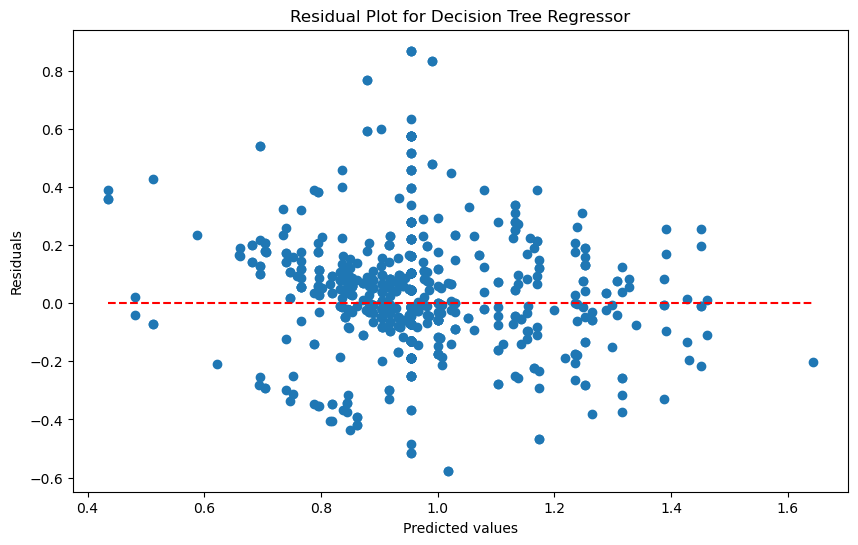

In [29]:
residualsMath = y_testMath-y_dt_predMath
plt.figure(figsize=(10, 6))


plt.scatter(y_dt_predMath, residualsMath)
plt.hlines(y=0, xmin=min(y_dt_predMath), xmax=max(y_dt_predMath), colors='r', linestyles='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Decision Tree Regressor")
plt.show()


Act Math Encoded 
-district:45
-label proficent_score 

In [30]:
actMath_11_encoded_df.head()

,studentId,is_proficient,proficient_score,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy,category_MATHEMATICS,category_ENGLISH,category_SCIENCE,category_SOCIAL_STUDIES,category_FOREIGN_LANGUAGE,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,45054,False,0.264706,True,False,False,False,0,0,0,1,0,1,0,0,False,False,False,False,True,False,False,False,False,False
1,45054,False,0.264706,True,False,False,False,0,0,0,1,0,1,0,0,False,False,False,False,True,False,False,False,False,False
2,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False
3,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False
4,45440,False,0.941176,False,False,False,False,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False


In [31]:
actMath_11_encoded_df.dtypes

studentId                        int64
is_proficient                     bool
proficient_score               float64
school_High School A              bool
school_High School B              bool
school_High School C              bool
school_High School D              bool
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS          bool
category_VISUAL_ARTS              bool
category_TECHNOLOGY               bool
category_BUSINESS                 bool
category_TRADES                   bool
category_AGRICULTURE              bool
category_PHYSICAL_EDUCATION       bool
category_HEALTH                   bool
category_CAREER_PREP              bool
category_MILITARY_SCIENCE         bool
dtype: object

In [32]:
#changing every bool into intsa
actMath_11_encoded_df[actMath_11_encoded_df.select_dtypes(include=['bool']).columns] = actMath_11_encoded_df.select_dtypes(include=['bool']).astype(int)
print(actMath_11_encoded_df.dtypes)


studentId                        int64
is_proficient                    int32
proficient_score               float64
school_High School A             int32
school_High School B             int32
school_High School C             int32
school_High School D             int32
iready_math                      int64
iready_reading                   int64
bbb_literacy                     int64
category_MATHEMATICS             int64
category_ENGLISH                 int64
category_SCIENCE                 int64
category_SOCIAL_STUDIES          int64
category_FOREIGN_LANGUAGE        int64
category_PERFORMING_ARTS         int32
category_VISUAL_ARTS             int32
category_TECHNOLOGY              int32
category_BUSINESS                int32
category_TRADES                  int32
category_AGRICULTURE             int32
category_PHYSICAL_EDUCATION      int32
category_HEALTH                  int32
category_CAREER_PREP             int32
category_MILITARY_SCIENCE        int32
dtype: object


In [33]:
#training 
actMath_11_encoded_df_copy1 = actMath_11_encoded_df.drop(['is_proficient', 'studentId'], axis=1).copy()
actMath_11_encoded_df_copy1.head(10)


,proficient_score,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy,category_MATHEMATICS,category_ENGLISH,category_SCIENCE,category_SOCIAL_STUDIES,category_FOREIGN_LANGUAGE,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,0.264706,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.264706,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.941176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.941176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.941176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.941176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.941176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1.029412,1,0,0,0,0,0,0,1,1,1,2,0,0,1,0,0,0,0,1,1,0,0
9,1.029412,1,0,0,0,0,0,0,1,1,1,2,0,0,1,0,0,0,0,1,1,0,0


In [34]:
print(actMath_11_encoded_df_copy1.shape)
print(actMath_11_encoded_df_copy1.columns)

(2580, 23)
Index(['proficient_score', 'school_High School A', 'school_High School B',
       'school_High School C', 'school_High School D', 'iready_math',
       'iready_reading', 'bbb_literacy', 'category_MATHEMATICS',
       'category_ENGLISH', 'category_SCIENCE', 'category_SOCIAL_STUDIES',
       'category_FOREIGN_LANGUAGE', 'category_PERFORMING_ARTS',
       'category_VISUAL_ARTS', 'category_TECHNOLOGY', 'category_BUSINESS',
       'category_TRADES', 'category_AGRICULTURE',
       'category_PHYSICAL_EDUCATION', 'category_HEALTH',
       'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')


In [35]:
y_MathEn = actMath_11_encoded_df_copy1['proficient_score']
X_MathEn= actMath_11_encoded_df_copy1.drop(columns='proficient_score', axis=1)
print("Number of examples: " + str(X_MathEn.shape[0]))
X_train_MathEn,X_test_MathEn, y_train_MathEn,y_test_MathEn = train_test_split(X_MathEn,y_MathEn, test_size=0.33, random_state=123)
print(X_train_MathEn.shape)
print(X_test_MathEn.shape)

Number of examples: 2580
(1728, 22)
(852, 22)


In [36]:
X_train_MathEn.columns

Index(['school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [37]:
#setting up the param grid, possible hyperparameter for max_depth and min_samples_leaf
max_depth_values_MathEn = [8,12,25,32]
min_samples_leaf_values_MathEn = [4,5,8,10]
param_grid_MathEn = {'max_depth' : list(max_depth_values_MathEn), 'min_samples_leaf' : list(min_samples_leaf_values_MathEn)}

#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressor_MathEn = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid_MathEn = GridSearchCV(dt_regressor_MathEn, param_grid_MathEn, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search_MathEn = dt_grid_MathEn.fit(X_train_MathEn, y_train_MathEn)

print("Done")
dt_best_params_MathEn = dt_grid_search_MathEn.best_params_

dt_best_params_MathEn

#{'max_depth': 12, 'min_samples_leaf': 10}


Running Grid Search
Done


{'max_depth': 12, 'min_samples_leaf': 10}

In [38]:
dt_model_MathEn= DecisionTreeRegressor(max_depth=12, min_samples_leaf=10)
dt_model_MathEn.fit(X_train_MathEn,y_train_MathEn)

#testing model on the X_test
y_dt_pred_MathEn= dt_model_MathEn.predict(X_test_MathEn)
dt_rmse_MathEn= mean_squared_error(y_test_MathEn,y_dt_pred_MathEn,squared=False)
dt_r2_MathEn = r2_score(y_test_MathEn,y_dt_pred_MathEn)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse_MathEn))
print('[DT] R2: {0}'.format(dt_r2_MathEn))


[DT] Root Mean Squared Error: 0.19981589969700808
[DT] R2: 0.23802139533349875


In [39]:
X_train_MathEn.columns

Index(['school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [40]:
importances_MathEn = dt_model_MathEn.feature_importances_
feature_names_MathEn = X_train_MathEn.columns

# Combine names and importances, and sort
importance_df_MathEn= pd.DataFrame({'Feature': feature_names_MathEn, 'Importance': importances_MathEn})
importance_df_MathEn= importance_df_MathEn.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df_MathEn)

                        Feature  Importance
8              category_ENGLISH    0.562972
9              category_SCIENCE    0.155925
2          school_High School C    0.046481
10      category_SOCIAL_STUDIES    0.035827
17         category_AGRICULTURE    0.026062
7          category_MATHEMATICS    0.022977
11    category_FOREIGN_LANGUAGE    0.022776
13         category_VISUAL_ARTS    0.022330
18  category_PHYSICAL_EDUCATION    0.022129
3          school_High School D    0.021882
12     category_PERFORMING_ARTS    0.013871
0          school_High School A    0.010556
19              category_HEALTH    0.006262
16              category_TRADES    0.005758
20         category_CAREER_PREP    0.005610
4                   iready_math    0.005327
21    category_MILITARY_SCIENCE    0.005138
14          category_TECHNOLOGY    0.004003
1          school_High School B    0.002959
5                iready_reading    0.001155
6                  bbb_literacy    0.000000
15            category_BUSINESS 

Scantron Reading for grades 3-8 #label will be proficient_score

In [41]:
scantron_reading38.head()


,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.969279
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False

In [42]:
scantron_reading38.columns

Index(['studentId', 'level', 'dataSource', 'is_proficient', 'proficient_score',
       'course_AIDELIB7-8NC', 'course_AIDSTU6-12NC', 'course_ARTHIS7-8',
       'course_Advisory 5', 'course_Advisory 6',
       ...
       'school_Elementary School F', 'school_Intermediate School E',
       'school_Middle School A', 'school_Middle School C',
       'school_Middle School D', 'school_Middle School F', 'iready_math',
       'iready_reading', 'bbb_literacy', 'past_proficient_score'],
      dtype='object', length=142)

In [43]:
scantron_reading38_df_copy = scantron_reading38.drop(['is_proficient', 'dataSource', 'studentId'], axis=1).copy()
scantron_reading38_df_copy.head()

,level,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,7,0.993342,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.969279
1,7,0.997179,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,F

In [44]:
print(scantron_reading38_df_copy.columns)

Index(['level', 'proficient_score', 'course_AIDELIB7-8NC',
       'course_AIDSTU6-12NC', 'course_ARTHIS7-8', 'course_Advisory 5',
       'course_Advisory 6', 'course_Advisory 7', 'course_Advisory 7-8',
       'course_Advisory 8',
       ...
       'school_Elementary School F', 'school_Intermediate School E',
       'school_Middle School A', 'school_Middle School C',
       'school_Middle School D', 'school_Middle School F', 'iready_math',
       'iready_reading', 'bbb_literacy', 'past_proficient_score'],
      dtype='object', length=139)


In [45]:
scantron_reading38_df_copy.dtypes

level                             int64
proficient_score                float64
course_AIDELIB7-8NC                bool
course_AIDSTU6-12NC                bool
course_ARTHIS7-8                   bool
course_Advisory 5                  bool
course_Advisory 6                  bool
course_Advisory 7                  bool
course_Advisory 7-8                bool
course_Advisory 8                  bool
course_Aide Off 7-8                bool
course_BAND 6                      bool
course_BAND 7 Brass                bool
course_BAND 7 Percu                bool
course_BAND 7 Wood                 bool
course_BROADCAS 7-8                bool
course_Band 7                      bool
course_Band7                       bool
course_BandGuitar78                bool
course_CONTISSU 7-8                bool
course_CREAWRT 7-8                 bool
course_CSElec Gr7-8                bool
course_CareerPrep-A                bool
course_CareerPrepA5                bool
course_CivicH/Adv 7                bool


In [46]:
#checking for any missing values
print(scantron_reading38_df_copy.isnull().sum())  


level                              0
proficient_score                   0
course_AIDELIB7-8NC                0
course_AIDSTU6-12NC                0
course_ARTHIS7-8                   0
course_Advisory 5                  0
course_Advisory 6                  0
course_Advisory 7                  0
course_Advisory 7-8                0
course_Advisory 8                  0
course_Aide Off 7-8                0
course_BAND 6                      0
course_BAND 7 Brass                0
course_BAND 7 Percu                0
course_BAND 7 Wood                 0
course_BROADCAS 7-8                0
course_Band 7                      0
course_Band7                       0
course_BandGuitar78                0
course_CONTISSU 7-8                0
course_CREAWRT 7-8                 0
course_CSElec Gr7-8                0
course_CareerPrep-A                0
course_CareerPrepA5                0
course_CivicH/Adv 7                0
course_CivicsGr 7                  0
course_ContIssu 7-8                0
c

In [47]:
#drop rows with missing past proficient score
scantron_reading38_df_copy = scantron_reading38_df_copy.dropna(subset=['past_proficient_score'])
print(scantron_reading38_df_copy.isnull().sum())  


level                           0
proficient_score                0
course_AIDELIB7-8NC             0
course_AIDSTU6-12NC             0
course_ARTHIS7-8                0
course_Advisory 5               0
course_Advisory 6               0
course_Advisory 7               0
course_Advisory 7-8             0
course_Advisory 8               0
course_Aide Off 7-8             0
course_BAND 6                   0
course_BAND 7 Brass             0
course_BAND 7 Percu             0
course_BAND 7 Wood              0
course_BROADCAS 7-8             0
course_Band 7                   0
course_Band7                    0
course_BandGuitar78             0
course_CONTISSU 7-8             0
course_CREAWRT 7-8              0
course_CSElec Gr7-8             0
course_CareerPrep-A             0
course_CareerPrepA5             0
course_CivicH/Adv 7             0
course_CivicsGr 7               0
course_ContIssu 7-8             0
course_Drama 7-8                0
course_ELA IntPK-6              0
course_ELAGrPK

In [48]:
y_Read38 = scantron_reading38_df_copy['proficient_score']
X_Read38= scantron_reading38_df_copy.drop(columns='proficient_score', axis=1)
print("Number of examples: " + str(X_Read38.shape[0]))



Number of examples: 15180


In [49]:
X_train_Read38,X_test_Read38, y_train_Read38,y_test_Read38 = train_test_split(X_Read38,y_Read38, test_size=0.33, random_state=123)
print(X_train_Read38.shape)
print(X_test_Read38.shape)

(10170, 138)
(5010, 138)


In [50]:
#setting up the param grid, possible hyperparameter for max_depth and min_samples_leaf
max_depth_values_Read38 = [8,12,25,32]
min_samples_leaf_values_Read38 = [4,5,8,10]
param_grid_Read38 = {'max_depth' : list(max_depth_values_Read38), 'min_samples_leaf' : list(min_samples_leaf_values_Read38)}

In [51]:
#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressor_Read38 = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid_Read38 = GridSearchCV(dt_regressor_Read38, param_grid_Read38, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search_Read38 = dt_grid_Read38.fit(X_train_Read38, y_train_Read38)

print("Done")
dt_best_params_Read38 = dt_grid_search_Read38.best_params_

dt_best_params_Read38

Running Grid Search
Done


{'max_depth': 8, 'min_samples_leaf': 10}

In [52]:
dt_model_Read38 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
dt_model_Read38.fit(X_train_Read38,y_train_Read38)

#testing model on the X_test
y_dt_pred_Read38 = dt_model_Read38.predict(X_test_Read38)
dt_rmse_Read38 = mean_squared_error(y_test_Read38,y_dt_pred_Read38,squared=False)
dt_r2_Read38 = r2_score(y_test_Read38,y_dt_pred_Read38)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse_Read38))
print('[DT] R2: {0}'.format(dt_r2_Read38))

[DT] Root Mean Squared Error: 0.06771693862192925
[DT] R2: 0.6282793242537225


In [53]:
importances_Read38 = dt_model_Read38.feature_importances_
feature_names_Read38 = X_train_Read38.columns

# Combine names and importances, and sort
importance_df_Read38 = pd.DataFrame({'Feature': feature_names_Read38, 'Importance': importances_Read38})
importance_df_Read38= importance_df_Read38.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df_Read38)

                          Feature  Importance
137         past_proficient_score    0.957465
0                           level    0.019911
51                course_HOMEROOM    0.007540
128    school_Elementary School F    0.002863
119             course_StuHallPK6    0.002068
66              course_Math 7 H/A    0.001398
55              course_LANGUAGE 4    0.000947
84                  course_PE 7-8    0.000702
101               course_SOC ST 5    0.000695
82                    course_PE 7    0.000662
96               course_SCIENCE 5    0.000620
50             course_HANDWRITING    0.000608
92               course_READING 4    0.000503
132        school_Middle School D    0.000453
57            course_LifeSciH Gr7    0.000426
133        school_Middle School F    0.000421
113           course_SocialStuGr6    0.000420
34             course_Eng 7 H/Adv    0.000414
38            course_English Gr 7    0.000316
79                    course_PE 4    0.000307
60                  course_MATH 4 

In [54]:
importance_df_Read38.head(15)

,Feature,Importance
137,past_proficient_score,0.957465
0,level,0.019911
51,course_HOMEROOM,0.007540
128,school_Elementary School F,0.002863
119,course_StuHallPK6,0.002068
66,course_Math 7 H/A,0.001398
55,course_LANGUAGE 4,0.000947
84,course_PE 7-8,0.000702
101,course_SOC ST 5,0.000695
82,course_PE 7,0.000662


Scantron Reading Encoded

In [55]:
scantron_reading38_encoded_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,False,True,False,False,False,0,0,0.969279,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,False,True,False,False,False,0,0,1.009665,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronReading,False,0.947277,False,False,False,False,False,True,False,False,False,0,0,0.934354,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronReading,True,1.014669,False,False,False,False,False,True,False,False,False,0,0,1.028650,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronReading,False,0.934665,False,False,False,False,False,True,False,False,False,0,0,0.949085,2,2,2,2,1,0,0,0,0


In [56]:
scantron_reading38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                      bool
proficient_score                float64
school_Elementary A                bool
school_Elementary School B         bool
school_Elementary School E         bool
school_Elementary School F         bool
school_Intermediate School E       bool
school_Middle School A             bool
school_Middle School C             bool
school_Middle School D             bool
school_Middle School F             bool
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [57]:
#turning bools in one hot encoded rows to 0 and 1
scantron_reading38_encoded_df[scantron_reading38_encoded_df.select_dtypes(include=['bool']).columns] = scantron_reading38_encoded_df.select_dtypes(include=['bool']).astype(int)
scantron_reading38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int32
proficient_score                float64
school_Elementary A               int32
school_Elementary School B        int32
school_Elementary School E        int32
school_Elementary School F        int32
school_Intermediate School E      int32
school_Middle School A            int32
school_Middle School C            int32
school_Middle School D            int32
school_Middle School F            int32
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [58]:
#checking for missing 
print(scantron_reading38_encoded_df.isnull().sum())  

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
school_Elementary A                0
school_Elementary School B         0
school_Elementary School E         0
school_Elementary School F         0
school_Intermediate School E       0
school_Middle School A             0
school_Middle School C             0
school_Middle School D             0
school_Middle School F             0
iready_math                        0
iready_reading                     0
past_proficient_score           5280
subject_math                       0
subject_reading                    0
subject_science                    0
subject_social-studies             0
subject_music                      0
subject_art                        0
subject_performing-arts            0
subject_phys-ed                    0
subject_career-prep                0
dtype: int64


In [59]:
scantron_reading38_encoded_df = scantron_reading38_encoded_df.dropna(subset=['past_proficient_score'])
print(scantron_reading38_encoded_df.isnull().sum())  

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
school_Elementary A             0
school_Elementary School B      0
school_Elementary School E      0
school_Elementary School F      0
school_Intermediate School E    0
school_Middle School A          0
school_Middle School C          0
school_Middle School D          0
school_Middle School F          0
iready_math                     0
iready_reading                  0
past_proficient_score           0
subject_math                    0
subject_reading                 0
subject_science                 0
subject_social-studies          0
subject_music                   0
subject_art                     0
subject_performing-arts         0
subject_phys-ed                 0
subject_career-prep             0
dtype: int64


In [60]:
print(scantron_reading38_encoded_df.columns)

Index(['studentId', 'level', 'dataSource', 'is_proficient', 'proficient_score',
       'school_Elementary A', 'school_Elementary School B',
       'school_Elementary School E', 'school_Elementary School F',
       'school_Intermediate School E', 'school_Middle School A',
       'school_Middle School C', 'school_Middle School D',
       'school_Middle School F', 'iready_math', 'iready_reading',
       'past_proficient_score', 'subject_math', 'subject_reading',
       'subject_science', 'subject_social-studies', 'subject_music',
       'subject_art', 'subject_performing-arts', 'subject_phys-ed',
       'subject_career-prep'],
      dtype='object')


In [61]:
y_Read38En = scantron_reading38_encoded_df['proficient_score']
X_Read38En= scantron_reading38_encoded_df.drop(['proficient_score','is_proficient','studentId','dataSource'],  axis=1)
print("Number of examples: " + str(X_Read38En.shape[0]))
X_train_Read38En,X_test_Read38En, y_train_Read38En,y_test_Read38En = train_test_split(X_Read38En,y_Read38En, test_size=0.33, random_state=123)
print(X_train_Read38En.shape)
print(X_test_Read38En.shape)

Number of examples: 15180
(10170, 22)
(5010, 22)


In [62]:
#setting up the param grid, possible hyperparameter for max_depth and min_samples_leaf
max_depth_values_Read38En = [8,12,25,32]
min_samples_leaf_values_Read38En = [4,5,8,10]
param_grid_Read38En = {'max_depth' : list(max_depth_values_Read38En), 'min_samples_leaf' : list(min_samples_leaf_values_Read38En)}

In [63]:
#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressor_Read38En = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid_Read38En = GridSearchCV(dt_regressor_Read38En, param_grid_Read38En, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search_Read38En = dt_grid_Read38En.fit(X_train_Read38En, y_train_Read38En)

print("Done")
dt_best_params_Read38En = dt_grid_search_Read38En.best_params_

dt_best_params_Read38En


Running Grid Search
Done


{'max_depth': 8, 'min_samples_leaf': 10}

In [64]:
dt_model_Read38En = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
dt_model_Read38En.fit(X_train_Read38En,y_train_Read38En)

#testing model on the X_test
y_dt_pred_Read38En = dt_model_Read38En.predict(X_test_Read38En)
dt_rmse_Read38En = mean_squared_error(y_test_Read38En,y_dt_pred_Read38En,squared=False)
dt_r2_Read38En= r2_score(y_test_Read38En,y_dt_pred_Read38En)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse_Read38En))
print('[DT] R2: {0}'.format(dt_r2_Read38En))


[DT] Root Mean Squared Error: 0.06749921374328938
[DT] R2: 0.6306658092958388


In [65]:
importances_Read38En = dt_model_Read38En.feature_importances_
feature_names_Read38En = X_train_Read38En.columns

# Combine names and importances, and sort
importance_df_Read38En = pd.DataFrame({'Feature': feature_names_Read38En, 'Importance': importances_Read38En})
importance_df_Read38En= importance_df_Read38En.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df_Read38En)

                         Feature  Importance
12         past_proficient_score    0.965493
0                          level    0.022628
16        subject_social-studies    0.005645
4     school_Elementary School F    0.002302
8         school_Middle School D    0.000943
9         school_Middle School F    0.000897
20               subject_phys-ed    0.000649
6         school_Middle School A    0.000479
3     school_Elementary School E    0.000399
7         school_Middle School C    0.000183
5   school_Intermediate School E    0.000147
15               subject_science    0.000128
13                  subject_math    0.000106
19       subject_performing-arts    0.000000
18                   subject_art    0.000000
17                 subject_music    0.000000
11                iready_reading    0.000000
14               subject_reading    0.000000
1            school_Elementary A    0.000000
10                   iready_math    0.000000
2     school_Elementary School B    0.000000
21        